# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras

# Train Test

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [6]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
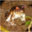

In [7]:
x_train[0]

# Keras

In [8]:
model=keras.Sequential()

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

In [12]:
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))

In [13]:
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

In [14]:
model.add(keras.layers.Flatten())

In [15]:
model.add(keras.layers.Dense(64,activation='relu'))

In [16]:
model.add(keras.layers.Dense(10,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,586 (330.41 KB)

 Trainable params: 84,586 (330.41 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
callback1=keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3) #early stopping controls overfitting

In [20]:
model.fit(x=x_train,y=y_train,batch_size=32,epochs=50,verbose='auto',callbacks=[callback1],validation_data=(x_test,y_test),validation_split=0.2)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.1625 - loss: 3.0573 - val_accuracy: 0.3654 - val_loss: 1.7379
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4129 - loss: 1.6033 - val_accuracy: 0.5038 - val_loss: 1.3897
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5216 - loss: 1.3439 - val_accuracy: 0.5583 - val_loss: 1.2488
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5799 - loss: 1.1855 - val_accuracy: 0.5365 - val_loss: 1.3578
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6143 - loss: 1.0993 - val_accuracy: 0.6001 - val_loss: 1.1666
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6467 - loss: 1.0116 - val_accuracy: 0.5907 - val_loss: 1.2166
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6714 - loss: 0.9516 - val_accuracy: 0.6169 - val_loss: 1.1458
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6899 - loss: 0.8994 

In [21]:
model.evaluate(x=x_test,y=y_test,batch_size=32,verbose='auto')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6341 - loss: 1.1650


[1.1738134622573853, 0.6292999982833862]

In [22]:
model.predict(x_test,batch_size=32,verbose='auto')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[9.2677888e-04, 9.3577290e-04, 4.5424425e-03, ..., 9.8273814e-02,
        1.5647053e-04, 2.0665193e-03],
       [1.5049323e-04, 1.7782776e-03, 5.6170698e-08, ..., 1.3974820e-08,
        9.9807101e-01, 1.7767685e-07],
       [3.1260607e-01, 2.9134989e-02, 1.9328679e-03, ..., 5.9398654e-04,
        1.6961704e-01, 4.7519448e-01],
       ...,
       [2.6362798e-07, 2.2883915e-09, 5.2261516e-03, ..., 5.9945410e-04,
        2.8757496e-09, 9.3001529e-07],
       [8.8065993e-03, 4.3771364e-02, 1.0630216e-01, ..., 1.6576014e-01,
        6.9280103e-04, 4.5910045e-03],
       [1.6942888e-08, 1.7175786e-07, 9.6589895e-07, ..., 9.9368733e-01,
        1.0850471e-10, 1.4959585e-07]], dtype=float32)